   Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Goals">Goals</a></li>
<li><a href="#Tools">Tools</a></li>
<li><a href="#Dataextraction">Data Extraction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Visualization">Data Visualization</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
- This dataset is a collection of Avgerage temprerature of world and cities with different countries.
- It consists of 218 entries of years for local data(1796-2013) and 266(1750-2016)
- Our objective is to find ot What are trends between these 2 temp.

<a id='Goals'></a>
## Goals
-	For Data Extarction SQL queries to use.
-	Calculation of moving average to smooth out the temp data over a specified period of time by creating a constantly updated     average temp.
-	Drawing a line chart with legends and labels to compare the temperature trends between city and World.
-	Finding the relevant Conclusions about the data visualization.


<a id='Tools'></a>
## Tools Used 
-	1.SQL - To extract data from the database through query.
-	2.Python – Calculating Moving average and plotting the line chart.
-	3.Anaconda - Jupyter Notebook – For writing python code and making observation.

<a id='Dataextraction'></a>
## DATA EXTRACTION – 



SELECT * FROM city_list WHERE city LIKE 'Hyd%' AND country LIKE  'Ind%'	  --       To find the data of  nearest city 


SELECT * FROM city_data WHERE city = 'Hyderabad' and country = 'India'  --    To Find City’s average temperature across years 


SELECT * FROM global_data	                            ---                     To Find World average temperature across years 


 - Set up enviornment 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## DATA WRANGLING

- Data manipulation i.e Discovering NULL entries and replacing them with some values , finding duplicates and handling them.
- Local data have 7 null entries which are present in avg_temp column.These are successfully replaced with mean of avg temp    column.
- There are 266 entries in the global data and 218 entries in the local data but ranges should be same so data selected  from range 1796-2003 for both datasets so that our line chart can compare with same time frames.
- Dropped city and country column from global database which are not requied.


In [2]:
# Loading local and global temp data
df_local = pd.read_csv("localdata.txt")
df_global = pd.read_csv("Global Data.txt")

In [3]:
#finding NULL entries
df_local.isnull().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

In [4]:
#finding unique entries in the local data
df_local.nunique()

year        218
city          1
country       1
avg_temp    133
dtype: int64

In [5]:
#null entries in global data
df_global.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [6]:
#finding no of rows and columns in both the data set
df_local.shape,df_global.shape

((218, 4), (266, 2))

In [7]:
#filling null values with the mean of avg_temp column
df_local["avg_temp"].fillna(df_local["avg_temp"].mean(),inplace = True)

In [8]:
#conforming the changes
df_local.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

In [9]:
#deleting country and city data from local dataframe
df_local.drop(["city","country"],axis = 1,inplace = True)

In [10]:
#conforming the changes
df_local.head()

,year,avg_temp
0,1796,26.53
1,1797,27.48
2,1798,26.20
3,1799,26.84
4,1800,26.88


In [11]:
#Analysing on lenght and assigning to a new data set as we are provided with a local data of 1796-2013
new_global = df_global[(df_global.year >= 1796) & (df_global.year <= 2013)]

In [12]:
new_global.shape

(218, 2)

In [13]:
df_local.shape

(218, 2)

In [14]:
#Lengths must match to compare
df_local.columns == df_global.columns

array([ True,  True])

### CALCULATING MOVING AVARAGE

- Moving Average are Calculated for 20 years.
- In pandas we have a function called rolling average function which calculates unweighted means of last n values which is     
  applied row by row so that we get a series of Averages.
- In excel same way we aggregate over a defined number of rows.

In [15]:
glb_mv_avg = new_global['avg_temp'].rolling(20).mean()
local_mv_avg = df_local['avg_temp'].rolling(20).mean()

<a id='Visualization'></a>
## DATA VISUALIZATION

- Data visualization is the graphical representation of information and data.
- To understand trends,pattern,outlier it is used.
- matplotlib.pyplot's plot function is used here for visualization.


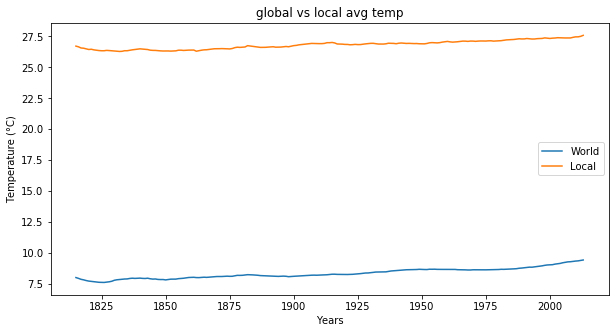

In [29]:
#plotting with moving average
plt.figure(figsize=[10,5])
plt.plot(new_global['year'],glb_mv_avg,label='World')
plt.plot(df_local['year'],local_mv_avg,label='Local')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.title("global vs local avg temp")
plt.show()

<a id='Conclusions'></a>
## Conclusions

#### Moving average significance
- Moving Averge makes the lines smooth to observe long term trends and not getting lost in yearly fluctuation. 
- Below plotted the line chart without moving average to see the differences.

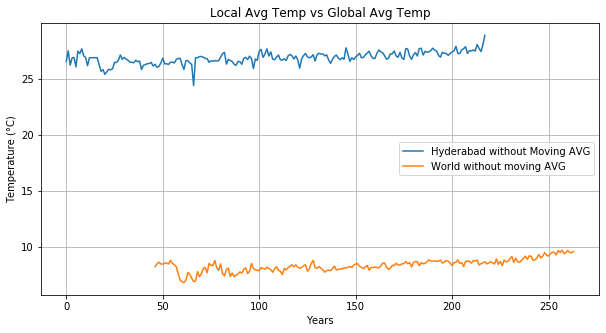

In [17]:
#plotting the line chart
plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df_local['avg_temp'],label='Hyderabad without Moving AVG')
plt.plot(new_global['avg_temp'],label='World without moving AVG')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.title("Local Avg Temp vs Global Avg Temp")
plt.show();

### Temperatue Comparison

- The local temp is significantly higher than global temp.
- Local temp data is normal distributed showing 1 outlier 24.38 (°C).
- Local temp is  min - 24.38 (°C) and max = 28.85 (°C)
- Minimum temp is 6.86 to max is varies 9.73.
- Range for global data is approx 3(°C) while for local data is approx 4.5(°C).




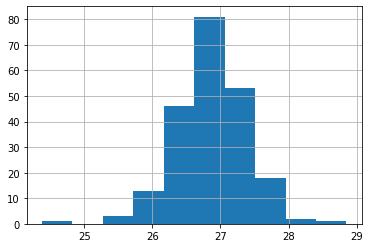

In [18]:
#histogarm plot for local data
df_local["avg_temp"].hist();

In [19]:
df_local.describe()

,year,avg_temp
count,218.000000,218.000000
mean,1904.500000,26.861564
std,63.075352,0.533463
min,1796.000000,24.380000
25%,1850.250000,26.562500
50%,1904.500000,26.861564
75%,1958.750000,27.220000
max,2013.000000,28.850000


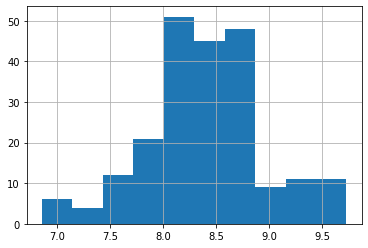

In [20]:
#histogarm plot for global data
new_global["avg_temp"].hist();

In [21]:
new_global.describe()

,year,avg_temp
count,218.000000,218.000000
mean,1904.500000,8.403532
std,63.075352,0.548662
min,1796.000000,6.860000
25%,1850.250000,8.092500
50%,1904.500000,8.415000
75%,1958.750000,8.727500
max,2013.000000,9.730000


##### Calculation correlation coefficent for both data 
- Scatter plot shows both the data are positive co related but global data is highly related for that I found out the corr coeff.
- Co-realtion coff for local data is - 0.636 
- Co-realtion coff for global data is - 0.7652


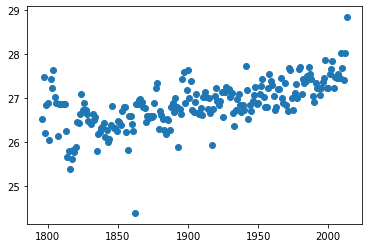

In [22]:
#scatter plot for  the  loacal data
plt.scatter(df_local['year'],df_local['avg_temp']);

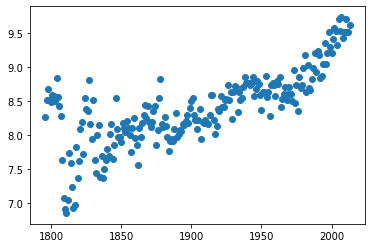

In [23]:
#scatter plot for the global data
plt.scatter(new_global['year'],new_global['avg_temp']);


##### corr coeff for global data is in between 0.7 - 1.0 so it is highly co-related i.e global temp is rapidly increasing.

In [24]:
#co relation coff for local 
corr_local = df_local.corr(method='pearson')
corr_local

,year,avg_temp
year,1.000000,0.636648
avg_temp,0.636648,1.000000


In [25]:
#co relation coff for global
corr_global = new_global.corr(method='pearson')
corr_global

,year,avg_temp
year,1.000000,0.765267
avg_temp,0.765267,1.000000


##### Local avgerage temp is greater than world's avgerage temp.
- Local mean temp - 26.86
- World mean temp - 8.4

In [26]:
#avarage temp of delhi 
df_local["avg_temp"].mean()

26.861563981042664

In [27]:
#average temp of world
new_global["avg_temp"].mean()

8.403532110091742